In [1]:
# Predicting heart disease classification using machine learning
# getting our tools ready

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to view the plots in our notebooks
%matplotlib inline

# modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#evaluation metrics
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,f1_score,recall_score
#from sklearn.metrics import plot_roc_curve
from scikitplot.metrics import plot_roc

In [2]:
df=pd.read_csv('heart-disease.csv')
df
    

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
100*df['target'].value_counts()/len(df)

1    54.455446
0    45.544554
Name: target, dtype: float64

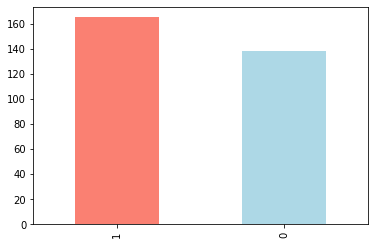

In [8]:
df['target'].value_counts().plot(kind='bar', color=['salmon','lightblue']);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
pd.crosstab(df['target'],df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


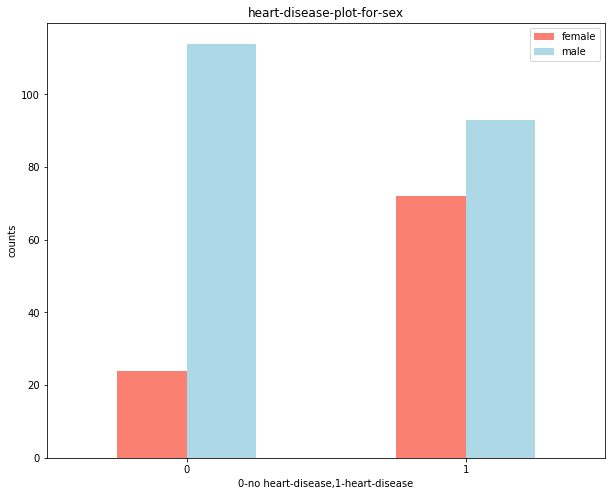

In [14]:
#create a plot of crosstab
pd.crosstab(df['target'],df['sex']).plot(kind='bar',color=['salmon','lightblue'],figsize=(10,8))
plt.title('heart-disease-plot-for-sex')
plt.xlabel('0-no heart-disease,1-heart-disease')
plt.legend(['female','male'])
plt.ylabel('counts')
plt.xticks(rotation=0);

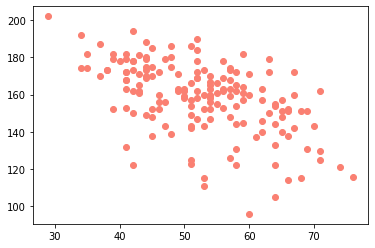

In [15]:
#scatter plot for age vs max.heart disease rate pos examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='salmon');


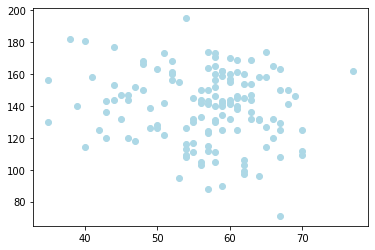

In [16]:
#scatter plot for age vs max.heart disease rate neg examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='lightblue');

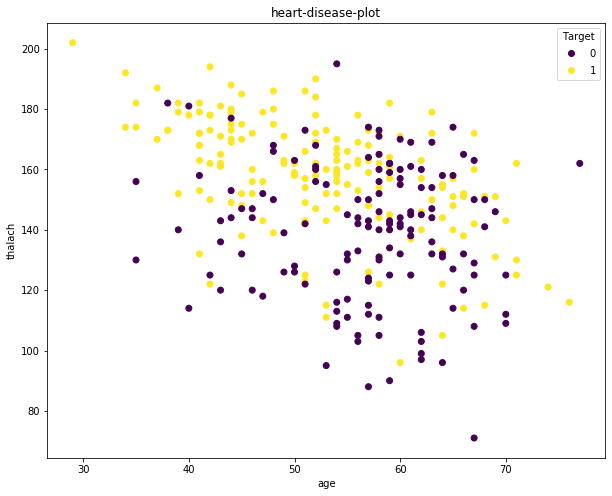

In [17]:
fig,ax=plt.subplots(figsize=(10,8))
scatter=ax.scatter(df['age'],df['thalach'],c=df['target'])
ax.set(title='heart-disease-plot',xlabel='age',ylabel='thalach')
ax.legend(*scatter.legend_elements(),title='Target');


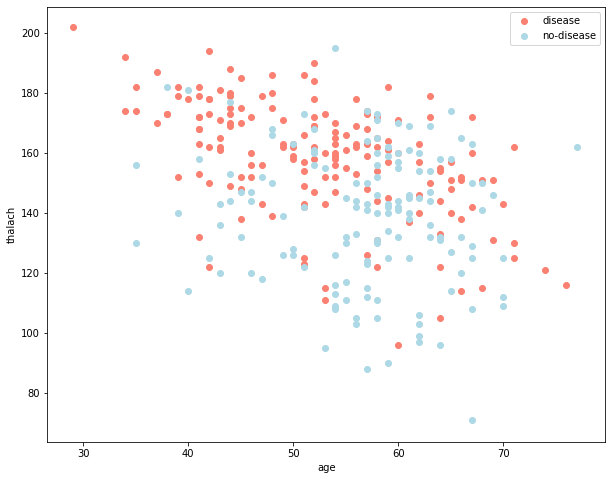

In [18]:
fig=plt.figure(figsize=(10,8))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='salmon')
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='lightblue')
plt.xlabel('age')
plt.ylabel('thalach')
plt.legend(['disease','no-disease']);

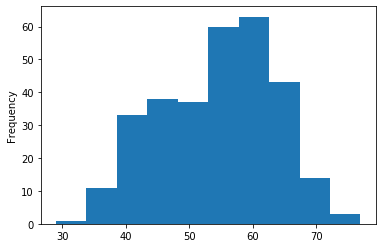

In [19]:
#check the distribution of the age column
df['age'].plot.hist();

In [20]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


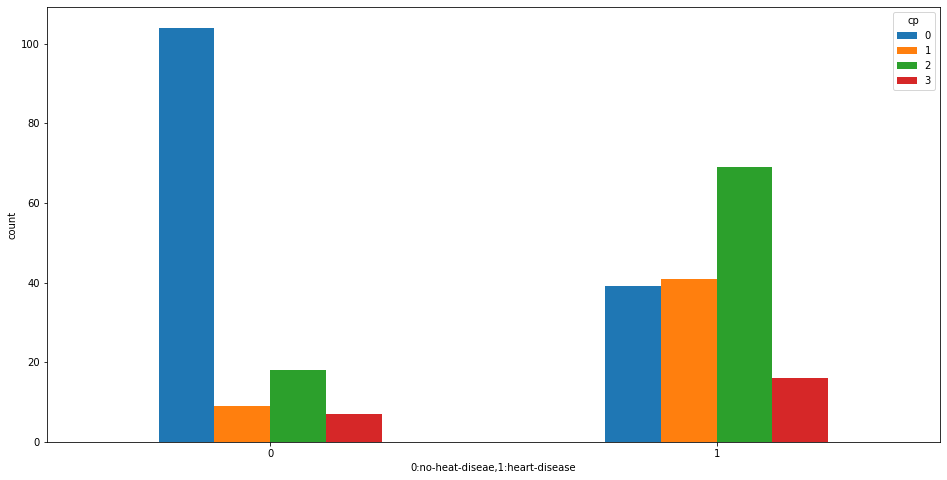

In [21]:
pd.crosstab(df.target,df.cp).plot(kind='bar',figsize=(16,8))
plt.xlabel('0:no-heat-diseae,1:heart-disease')
plt.ylabel('count')
plt.xticks(rotation=0);


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

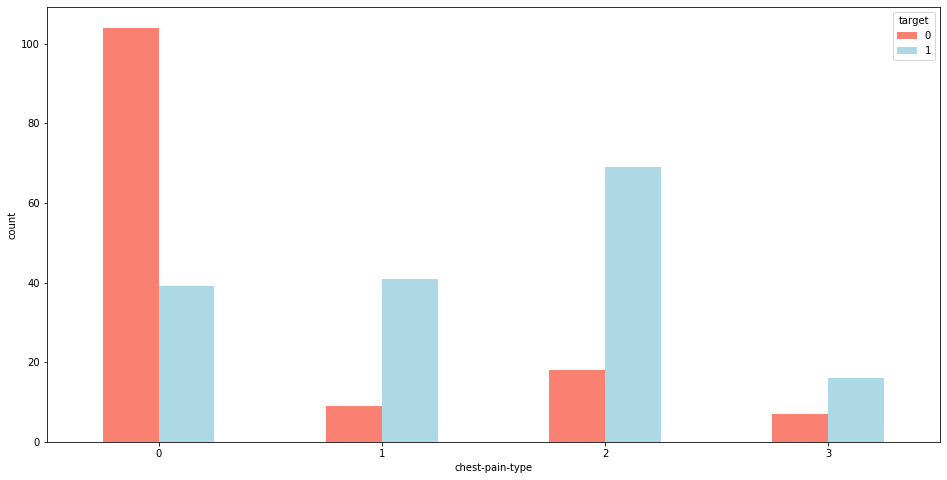

In [22]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(16,8),color=['salmon','lightblue'])
plt.xlabel('chest-pain-type')
plt.ylabel('count')
plt.xticks(rotation=0)


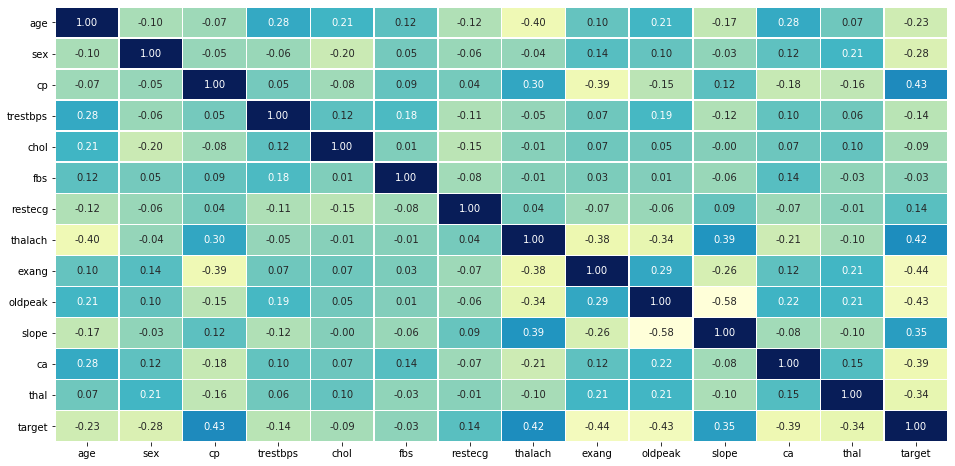

In [23]:
# next make a correlation matrix
corr_mat=df.corr()
fig,ax=plt.subplots(figsize=(16,8))
ax=sns.heatmap(corr_mat,
               annot=True,
               linewidths=0.5,
               cmap='YlGnBu',
              fmt=".2f",
              cbar=False)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom +0.5,top -0.5);


In [24]:
# sns.pairplot(corr_mat)
# plt.show();

# preparing our data for our machine learning problem

In [25]:
#split into x and y
X=df.drop('target',axis=1)
y=df['target']

In [26]:
np.random.seed(42)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [27]:
models={'logistic regression':LogisticRegression(),
       'KNN':KNeighborsClassifier(),
       'Random Forest':RandomForestClassifier()}

#creating a function to fit and score our models

def fit_and_score(models,x_train,x_test,y_train,y_test):
    
    np.random.seed(42)
    model_score={}
    
    for name,model in models.items():
        
        model.fit(x_train,y_train)
        model_score[name]=model.score(x_test,y_test)
    
    return model_score
        

In [28]:
model_score=fit_and_score(models,x_train,x_test,y_train,y_test)
model_score

C:\Users\proo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [29]:
model_compare=pd.DataFrame(model_score,index=['accuracy'])
model_compare

,logistic regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


In [30]:
model_compare.T

,accuracy
logistic regression,0.885246
KNN,0.688525
Random Forest,0.836066


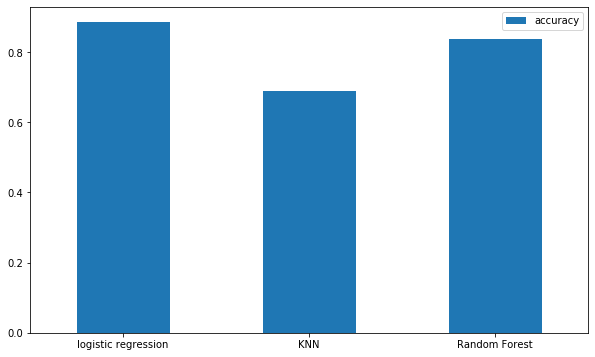

In [31]:
model_compare.T.plot(kind='bar',figsize=(10,6))
plt.xticks(rotation=0);

# Hyperparameter tuning

In [32]:
train_scores=[]
test_scores=[]

neighbors=range(1,21)
knn=KNeighborsClassifier()

for n in neighbors:
    knn.set_params(n_neighbors=n)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))



In [33]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [34]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

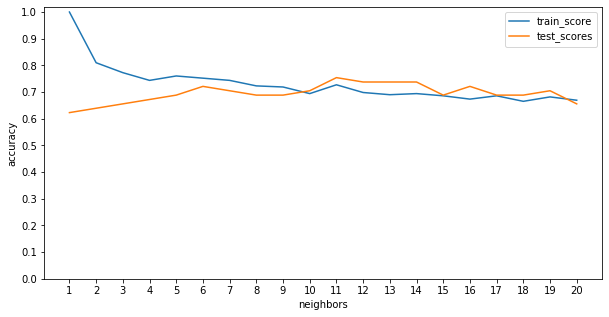

In [35]:
fig=plt.figure(figsize=(10,5))
plt.plot(neighbors,train_scores)
plt.plot(neighbors,test_scores)
plt.xticks(np.arange(1,21,1))
plt.yticks(np.arange(0.0,1.1,0.1))
plt.xlabel('neighbors')
plt.ylabel('accuracy')
plt.legend(['train_score','test_scores']);

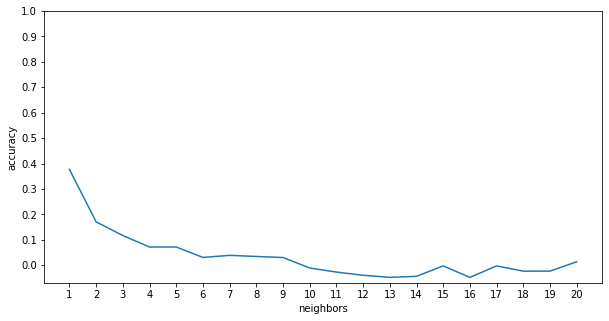

In [36]:
fig=plt.figure(figsize=(10,5))
plt.plot(neighbors,list(np.array(train_scores)-np.array(test_scores)),label='difference in scores')
plt.xticks(np.arange(1,21,1))
plt.yticks(np.arange(0.0,1.1,0.1))
plt.xlabel('neighbors')
plt.ylabel('accuracy');

In [37]:
print(f'the highest accuracy is :{max(test_scores)*100:.2f}%')

the highest accuracy is :75.41%


In [38]:
# creating hyperparameter tuning for logistic regression
log_reg_grid={'C':np.logspace(-4,4,20),
             'solver':['liblinear']}

#creating hyperparameter tuning for random forest classifier
rf_grid={'n_estimators':np.arange(10,1000,50),
         'max_depth':[None,3,5,10],
         'min_samples_split':np.arange(2,20,2),
         'min_samples_leaf':np.arange(1,20,2)}


In [101]:
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished
C:\Users\proo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributi...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [102]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [103]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [105]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.1min finished
C:\Users\proo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [107]:
rs_rf.best_params_

{'n_estimators': 360,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 5}

In [108]:
rs_rf.score(x_test,y_test)

0.8688524590163934

In [109]:
# Hyperparameter tuning for GridSearchCV
log_reg_grid={"C":np.logspace(-4,4,30),
            "solver":['liblinear']}

gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
C:\Users\proo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.0000000...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.

In [110]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [111]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

C:\Users\proo\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


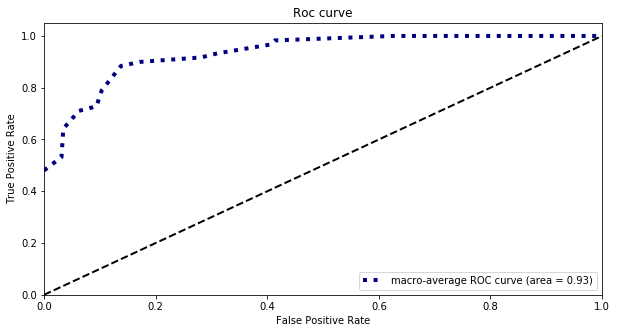

In [120]:
y_probas=gs_log_reg.predict_proba(x_test)
plot_roc(y_test,y_probas,figsize=(10,5),title='Roc curve',plot_micro=False,classes_to_plot='ignore');

In [126]:
y_prob_pos=y_probas[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_prob_pos)



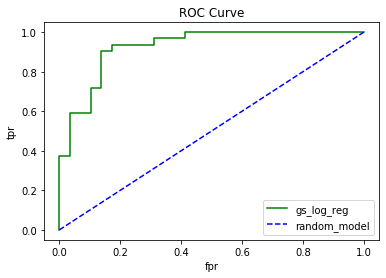

In [130]:
def plot_roc_curve(fpr,tpr):
    
    
    plt.plot(fpr,tpr,label='gs_log_reg',color='green')
    plt.plot([0,1],[0,1],label='random_model',color='blue',linestyle='--')
    plt.xlabel('fpr')
    plt.ylabel('tpr') 
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [143]:
y_pred=gs_log_reg.predict(x_test)
confusion_matrix(y_test,y_pred)
conf_mat=pd.crosstab(y_test,y_preds,rownames=['actual'],colnames=['predicted'])
conf_mat

predicted,0,1
actual,,
0,25,4
1,3,29


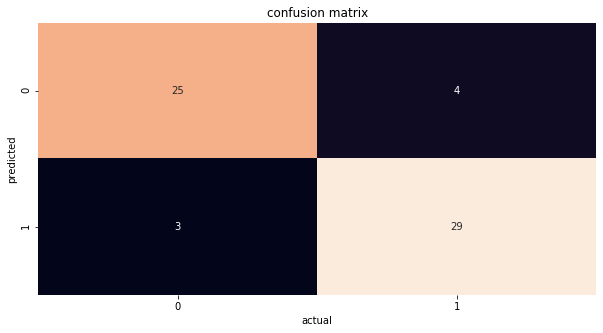

In [148]:
confusion_matrix(y_test,y_preds)
conf_mat=pd.crosstab(y_test,y_pred,rownames=['predicted'],colnames=['actual'])
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.heatmap(conf_mat,annot=True,cbar=False)
ax.set(title='confusion matrix')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom +0.5,top -0.5);

In [140]:
len(y_test),len(y_preds)

(61, 61)

In [149]:
# check best parameter for logistic regression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [162]:
clf=LogisticRegression(C=0.20433597178569418,solver='liblinear')

In [163]:
#cross validated accuracy
cv_acc=np.mean(cross_val_score(clf,X,y,cv=5,scoring='accuracy'))

In [164]:
#cross validated precision
cv_prec=np.mean(cross_val_score(clf,X,y,cv=5,scoring='precision'))

In [165]:
#cross validated recall
cv_recall=np.mean(cross_val_score(clf,X,y,cv=5,scoring='recall'))

In [166]:
#cross validated f1-score
cv_f1=np.mean(cross_val_score(clf,X,y,cv=5,scoring='f1'))


In [167]:
print(cv_acc,cv_prec,cv_recall,cv_f1)

0.8446994535519124 0.8207936507936507 0.9212121212121213 0.8673007976269721


In [170]:
metric={'cv_acc':cv_acc,
       'cv_prec':cv_prec,
       'cv_recall':cv_recall,
       'cv_f1':cv_f1}
metric_df=pd.DataFrame(metric,index=['accuracy'])
metric_df

,cv_acc,cv_prec,cv_recall,cv_f1
accuracy,0.844699,0.820794,0.921212,0.867301


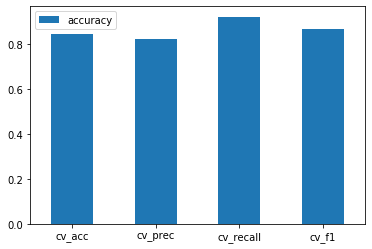

In [174]:
metric_df.T.plot(kind='bar')
plt.xticks(rotation=0);

# feature importance

In [176]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [177]:
clf=LogisticRegression(C=0.20433597178569418,solver='liblinear')
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [179]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [182]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

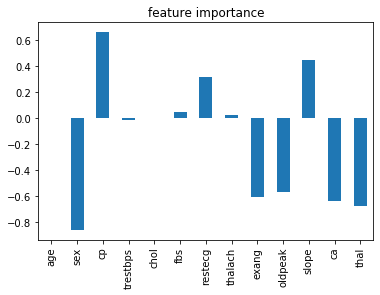

In [185]:
#visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title='feature importance',legend=False);